In [ ]:
# Data Overview

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

def display_stats_for_df(df):
    fig, axes = plt.subplots(1, 5, figsize=(18, 5))

    bins = 10

    # Gender vs Clicked (% clicked)
    gender_pct = df.groupby('Gender', observed=False)['Clicked on Ad'].mean() * 100
    gender_pct.plot(kind='bar', ax=axes[0])
    axes[0].set_title('Click Rate by Gender')
    axes[0].set_ylabel('% Clicked')

    # Age vs Clicked (% clicked by age bin)
    df['age_bin'] = pd.cut(df['Age'], bins=bins)
    age_pct = df.groupby('age_bin', observed=False)['Clicked on Ad'].mean() * 100
    age_pct.plot(kind='bar', ax=axes[1])
    axes[1].set_title('Click Rate by Age Bin')
    axes[1].set_ylabel('% Clicked')
    axes[1].tick_params(axis='x', rotation=45)

    # Time Spent vs Clicked (% clicked by time bin)
    df['time_spent_bin'] = pd.cut(df['Daily Time Spent on Site'], bins=bins)
    time_spent_pct = df.groupby('time_spent_bin', observed=False)['Clicked on Ad'].mean() * 100
    time_spent_pct.plot(kind='bar', ax=axes[2])
    axes[2].set_title('Click Rate by Time Spent Bin')
    axes[2].set_ylabel('% Clicked')
    axes[2].tick_params(axis='x', rotation=45)

    # Age vs Clicked (% clicked by age bin)
    df['internet_bin'] = pd.cut(df['Daily Internet Usage'], bins=bins)
    internet_pct = df.groupby('internet_bin', observed=False)['Clicked on Ad'].mean() * 100
    internet_pct.plot(kind='bar', ax=axes[3])
    axes[3].set_title('Click Rate by Daily Internet Usage')
    axes[3].set_ylabel('% Clicked')
    axes[3].tick_params(axis='x', rotation=45)

    # Time Spent vs Clicked (% clicked by time bin)
    df['income_bin'] = pd.cut(df['Area Income'], bins=bins)
    income_spent_pct = df.groupby('income_bin', observed=False)['Clicked on Ad'].mean() * 100
    income_spent_pct.plot(kind='bar', ax=axes[4])
    axes[4].set_title('Click Rate by Area Income')
    axes[4].set_ylabel('% Clicked')
    axes[4].tick_params(axis='x', rotation=45)

    plt.tight_layout()

In [11]:
from sklearn.linear_model import LinearRegression

def scatter_features(df, featureX, featureY, figsize=(8,6), alpha=0.7):
    x = df[featureX].values.reshape(-1, 1)
    y = df[featureY].values

    # Fit linear regression
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)
    r2 = model.score(x, y)  # R² value

    plt.figure(figsize=figsize)

    # Scatter points
    plt.scatter(x, y, color='blue', alpha=alpha)

    # Regression line
    plt.plot(x, y_pred, color='red', alpha=1, linewidth=2,
             label=f"y={model.coef_[0]:.2f}x+{model.intercept_:.2f}, R²={r2:.3f}")

    plt.xlabel(featureX)
    plt.ylabel(featureY)
    plt.title(f"{featureX} vs {featureY} with Linear Regression")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


In [3]:
df = pd.read_csv('E:/Coding/DatabricksETL/ad_10000records.csv')
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,61.660757,35.940100,53840.047721,177.759831,0.491700
std,15.704142,8.572973,13343.708718,40.820951,0.499956
min,32.600000,19.000000,13996.500000,105.220000,0.000000
25%,48.860000,29.000000,44052.302500,140.150000,0.000000
50%,59.590000,35.000000,56180.930000,178.920000,0.000000
75%,76.580000,42.000000,61840.260000,212.670000,1.000000
max,90.970000,60.000000,79332.330000,269.960000,1.000000


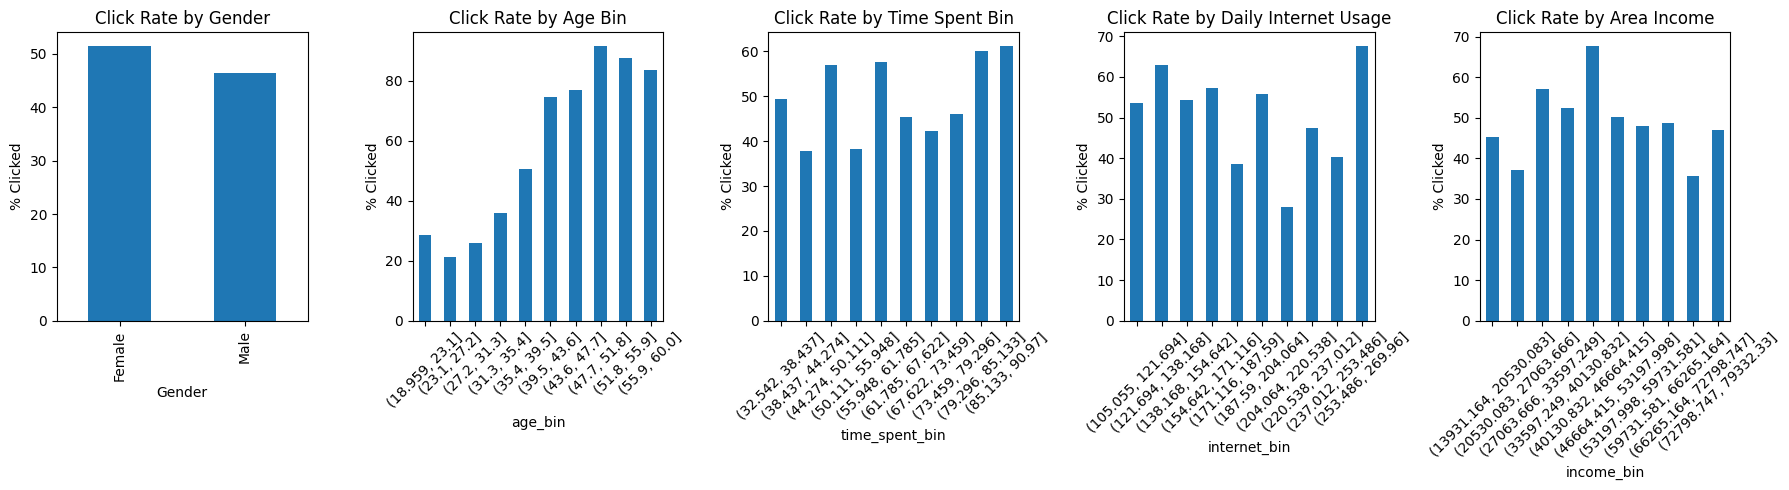

In [12]:
display_stats_for_df(df)

In [15]:
num_cols = df.select_dtypes(include=['number', 'bool']).columns
# exclude the group key if it slipped in (it won’t be numeric, but just in case)
num_cols = num_cols.drop('Country', errors='ignore')

stats = df.groupby('Country')[num_cols].agg(['mean', 'std'])
print(stats)

                  Daily Time Spent on Site                   Age            \
                                      mean        std       mean       std   
Country                                                                      
Afghanistan                      62.677368  13.731118  39.921053  9.447956   
Albania                          59.401354  17.539698  31.406250  6.185855   
Algeria                          58.501092   9.867787  26.068966  4.370932   
American Samoa                   58.847802  14.725610  32.978022  6.142707   
Andorra                          67.262308  18.918311  26.846154  3.050851   
...                                    ...        ...        ...       ...   
Wallis and Futuna                51.870000        NaN  39.000000       NaN   
Western Sahara                   74.230455  16.509272  38.204545  1.772300   
Yemen                            67.566667  11.684083  36.333333  8.778762   
Zambia                           55.254103  15.796292  30.307692

C:\Users\Potat\AppData\Local\Temp\ipykernel_49080\357681097.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(means.index.astype(str), rotation=45, ha='right')


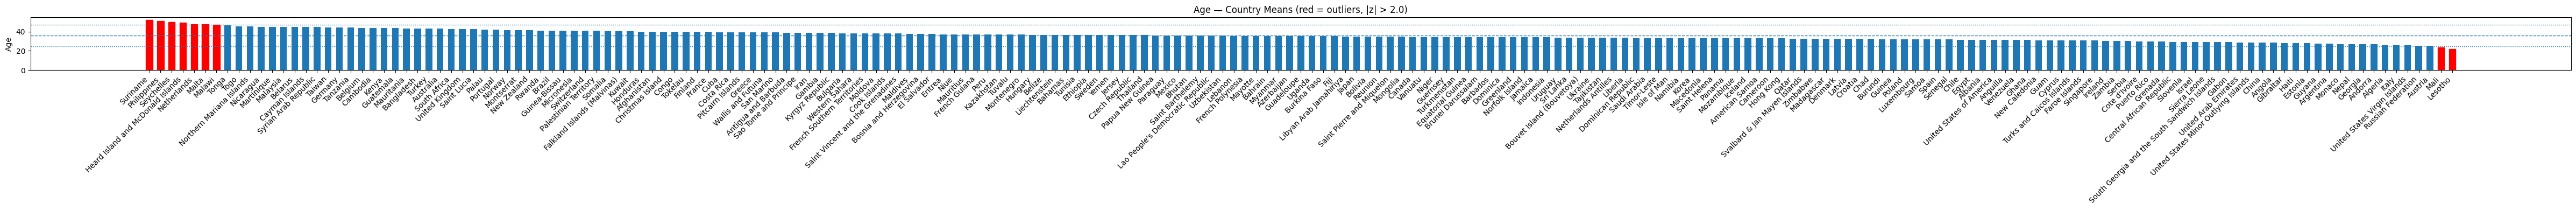

C:\Users\Potat\AppData\Local\Temp\ipykernel_49080\357681097.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(means.index.astype(str), rotation=45, ha='right')


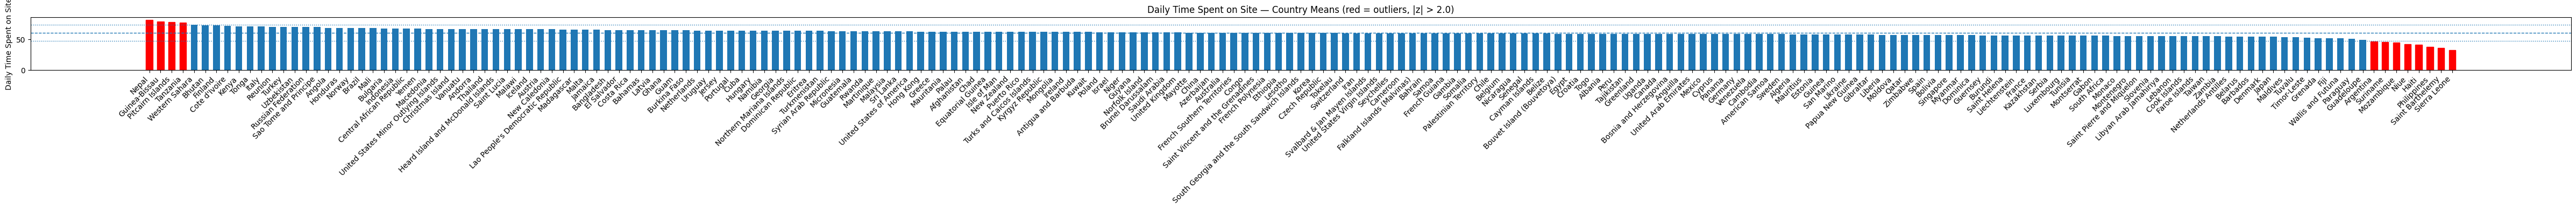

C:\Users\Potat\AppData\Local\Temp\ipykernel_49080\357681097.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(means.index.astype(str), rotation=45, ha='right')


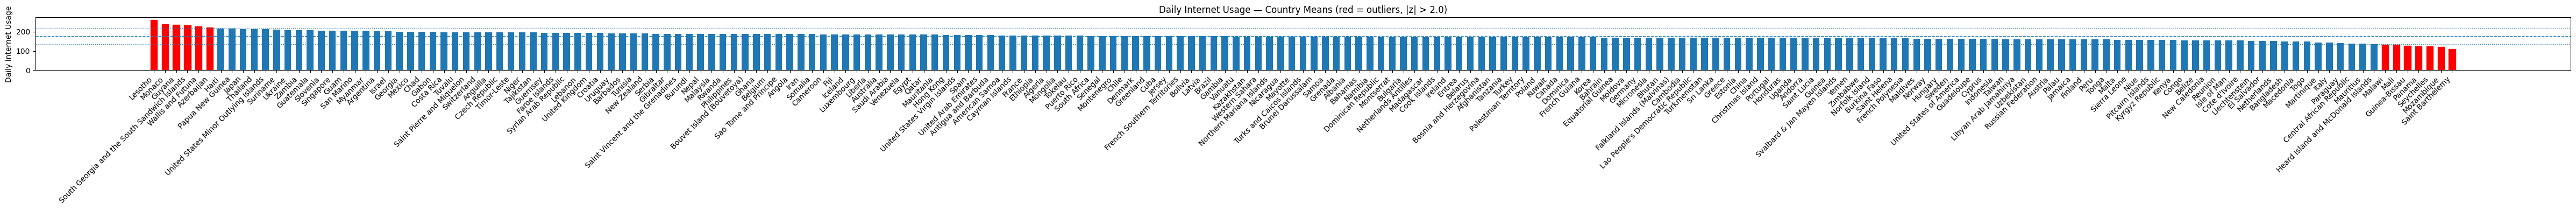

In [32]:
import numpy as np

def plot_country_means_with_outliers(
    df,
    features,
    country_col='Country',
    z_thresh=2.0,
    figsize=(48, 4)
):
    # ensure features are numeric
    features = [f for f in features if pd.api.types.is_numeric_dtype(df[f])]
    if not features:
        raise ValueError("No numeric features provided.")

    for feature in features:
        # mean per country for this feature
        means = (
            df.groupby(country_col, observed=True)[feature]
              .mean()
              .dropna()
              .sort_values(ascending=False)
        )

        if means.empty:
            continue

        overall_mean = means.mean()
        overall_std  = means.std(ddof=1)

        # flag outliers by z-score of the country means
        if overall_std == 0 or np.isnan(overall_std):
            is_outlier = pd.Series(False, index=means.index)
        else:
            is_outlier = (means - overall_mean).abs() > z_thresh * overall_std

        # plot
        fig, ax = plt.subplots(figsize=figsize)
        bars = ax.bar(means.index.astype(str), means.values, width=0.6)

        # color outliers red
        for i, out in enumerate(is_outlier):
            if out:
                bars[i].set_color('red')

        # reference lines (overall mean and ± z_thresh * std across country means)
        ax.axhline(overall_mean, linestyle='--', linewidth=1)
        if overall_std and not np.isnan(overall_std):
            ax.axhline(overall_mean + z_thresh * overall_std, linestyle=':', linewidth=1)
            ax.axhline(overall_mean - z_thresh * overall_std, linestyle=':', linewidth=1)

        ax.set_title(f"{feature} — Country Means (red = outliers, |z| > {z_thresh})")
        ax.set_ylabel(feature)
        ax.tick_params(axis='x', rotation=45)
        ax.set_xticklabels(means.index.astype(str), rotation=45, ha='right')

        plt.tight_layout()
        plt.show()
plot_country_means_with_outliers(df, ['Age', 'Daily Time Spent on Site', 'Daily Internet Usage'])

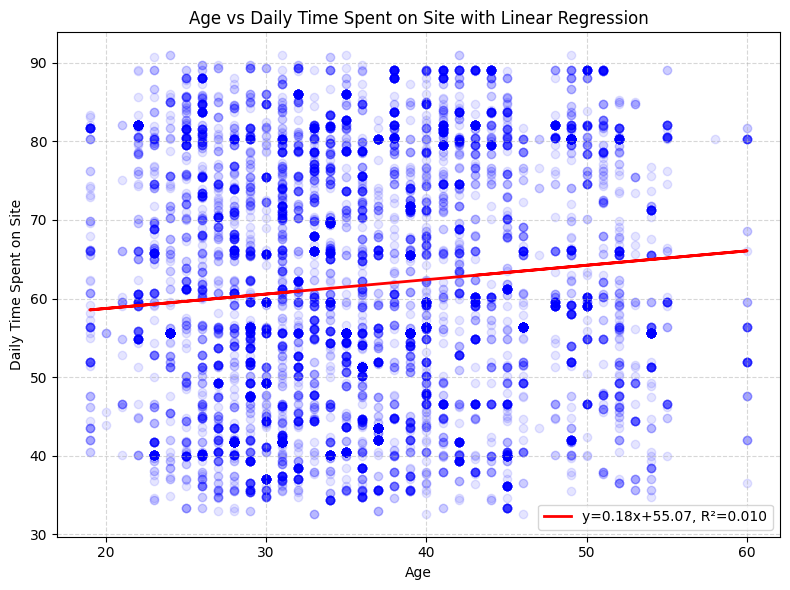

In [12]:
scatter_features(df, 'Age', 'Daily Time Spent on Site', alpha=0.1)

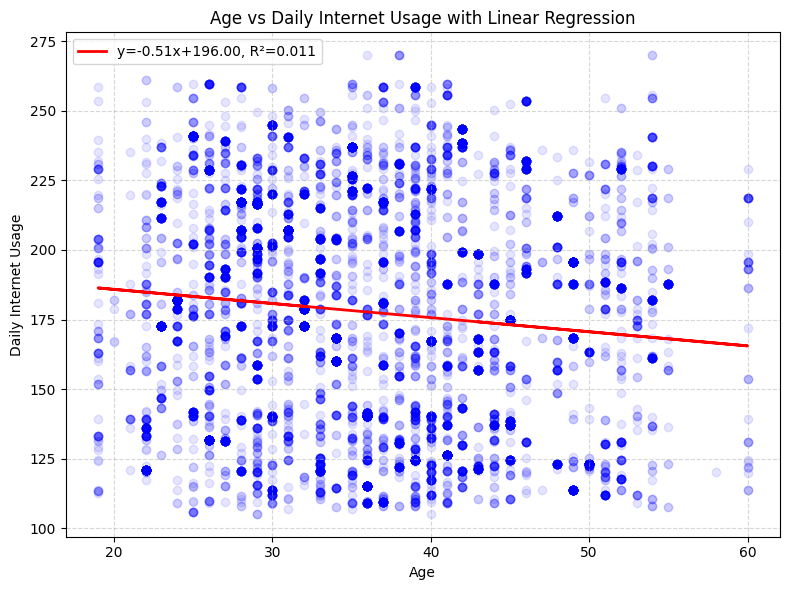

In [13]:
scatter_features(df, 'Age', 'Daily Internet Usage', alpha=0.1)

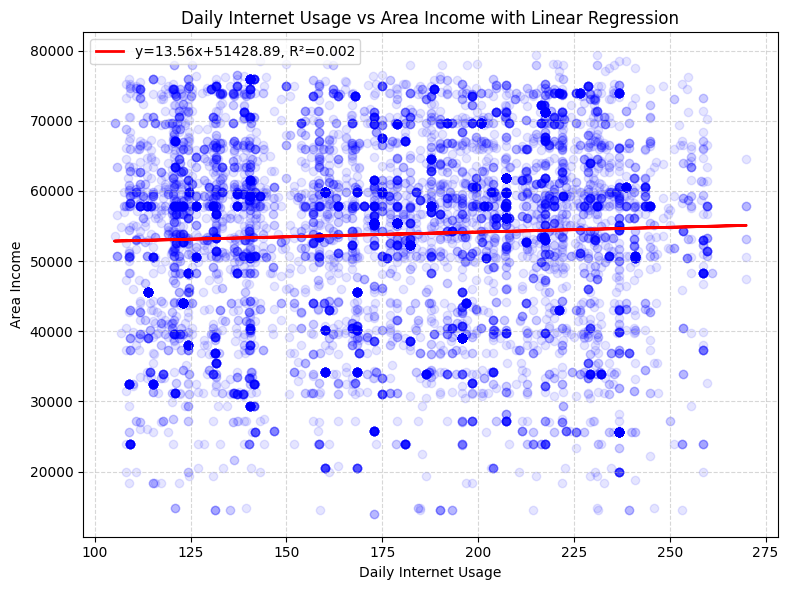

In [14]:
scatter_features(df, 'Daily Internet Usage', 'Area Income', alpha=0.1)